In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

entry_id = "aovTVkOn6YlLHtn3C9ylOGkFHvHA"

import gpr.analysis as gpa

singlePeriod = gpa.getData('singlePeriod')
tenPeriods = gpa.getData('tenPeriods')
periodVsAmplitude = gpa.getData('periodVsAmplitude')
periodVsLength = gpa.getData('periodVsLength')

/opt/conda/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
Schema is deprecated, use plugins. ()


Fetching remote uploads...
1 entries are qualified and added to the download list.


# Introduction
Pendulums are important because...

# Theory
In the small-angle approximation, the period of a pendulum is given by
\begin{equation}\label{period}
T=2\pi\sqrt{\frac{L}{g}}
\end{equation}

# Experimental setup

# Results

## Single-period measurement 
In this first experiment, a constant amplitude of ... was used. The period was measured 10 times as the duration between zero-point passages, and 10 times as the duration between reversal point passages. The resulst are shown in the table below

In [2]:
gpa.table(singlePeriod.drop('notes',axis=1)
          .style.set_caption("Single-period measurements")
                .format(subset='amplitude',precision=1)
                .format(subset='length',precision=3)
                .relabel_index(['Amplitude [$\\degree$]', 'Length [m]','Period at zero-point [s]','Period at reversal point [s]'],axis=1)
       )

Amplitude [$\degree$],Length [m],Period at zero-point [s],Period at reversal point [s]
5.0,2.727,3.35,3.40
5.0,2.727,3.34,3.28
5.0,2.727,3.30,3.41
5.0,2.727,3.32,3.29
5.0,2.727,3.29,3.26
5.0,2.727,3.37,3.36
5.0,2.727,3.30,3.22
5.0,2.727,3.36,3.49
5.0,2.727,3.30,3.24
5.0,2.727,3.32,3.20


Next, the duration was measured 10 times, as the duration of 10 zero-point passages, and ten times as the duration of 10 reversal-point passages. The results are shown in the table below.

In [3]:
# 
tenPeriods['zeroPointSingle']=tenPeriods['zeroPoint']/10.2
tenPeriods['reversePointSingle']=tenPeriods['reversePoint']/10.2
gpa.table(tenPeriods.drop("notes",axis=1).style.set_caption("10-period measurements"))

amplitude,length,zeroPoint,reversePoint,zeroPointSingle,reversePointSingle
5.00,2.73,33.27,33.30,3.26,3.26
5.00,2.73,33.33,33.25,3.27,3.26
5.00,2.73,33.30,33.31,3.26,3.27
5.00,2.73,33.25,33.27,3.26,3.26
5.00,2.73,33.35,33.36,3.27,3.27
5.00,2.73,33.30,33.29,3.26,3.26
5.00,2.73,33.29,33.26,3.26,3.26
5.00,2.73,33.34,33.33,3.27,3.27
5.00,2.73,33.25,33.36,3.26,3.27
5.00,2.73,33.28,33.20,3.26,3.25


The plot below shows the distribution of the period measurements for each of the 4 methods employed.

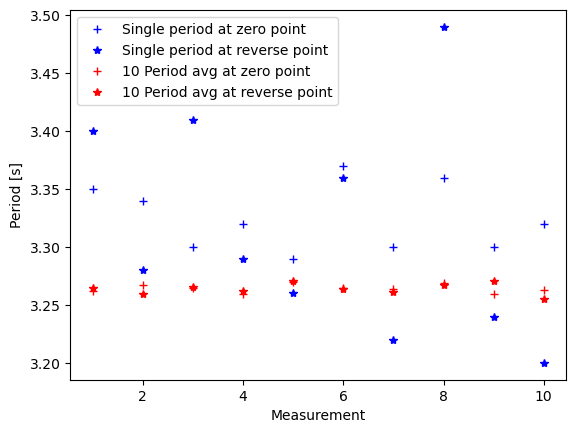

In [4]:
plt.plot(singlePeriod.index+1, singlePeriod['zeroPoint'],marker='+',linestyle='none',label='Single period at zero point', color='b')
plt.plot(singlePeriod.index+1, singlePeriod['reversePoint'],marker='*',linestyle='none',label='Single period at reverse point', color='b')
plt.plot(tenPeriods.index+1, tenPeriods['zeroPointSingle'],marker='+',linestyle='none',label='10 Period avg at zero point',color='r')
plt.plot(tenPeriods.index+1, tenPeriods['reversePointSingle'], marker='*',linestyle='none',label='10 Period avg at reverse point', color='r')
plt.xlabel('Measurement')
plt.ylabel('Period [s]')
plt.legend()
plt.title(f"Period measurement with length = {singlePeriod['length'][0]}m and amplitude={singlePeriod['amplitude'][0]}$\\degree$")
#plt.show()
gpa.figure()

Clearly, the best accuracy is obtained by ...

## Amplitude-dependence of the pendulum period

Measurement results:

In [5]:
avgPeriodVsAmplitude = periodVsAmplitude.groupby('amplitude',group_keys=True).agg('mean',numeric_only=True).reset_index()

gpa.table(periodVsAmplitude.drop("notes",axis=1).style.set_caption("The results of the amplitude-dependent period measurements"))
gpa.table(avgPeriodVsAmplitude.style.set_caption("Average period for each amplitude"))

length,amplitude,period
2.73,5.00,33.30
2.73,5.00,33.30
2.73,10.00,33.37
2.73,10.00,33.32
2.73,15.00,33.39
2.73,15.00,33.43
2.73,20.00,33.54
2.73,20.00,33.57
2.73,30.00,33.82
2.73,30.00,33.90


amplitude,length,period
5.00,2.73,33.30
10.00,2.73,33.34
15.00,2.73,33.41
20.00,2.73,33.55
30.00,2.73,33.86
45.00,2.73,34.63


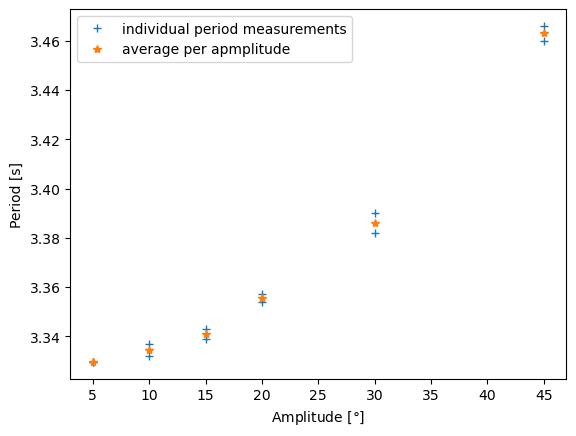

In [6]:
fig, ax=plt.subplots()
ax.plot(periodVsAmplitude['amplitude'],periodVsAmplitude['period']/10, linestyle='',marker='+',label='individual period measurements')
ax.plot(avgPeriodVsAmplitude['amplitude'],avgPeriodVsAmplitude['period']/10, linestyle='',marker='*',label='average per apmplitude')

ax.set_xlabel('Amplitude [$\\degree$]')
ax.set_ylabel('Period [s]')
ax.legend()
ax.set_title(f"Period measurement at different amplitudes, with length = {periodVsAmplitude['length'][0]}")

gpa.figure(ax)

## Length-dependence of period

In [7]:
gpa.table(periodVsLength.drop('notes',axis=1).style.set_caption("Pendulum-length dependence of period"))

amplitude,length,period
5.00,2.73,33.28
5.00,2.56,32.23
5.00,2.38,31.09
5.00,2.21,30.02
5.00,2.04,28.89
5.00,1.87,27.60
5.00,1.70,26.32
5.00,1.52,24.93
5.00,1.35,23.50
5.00,1.18,22.00


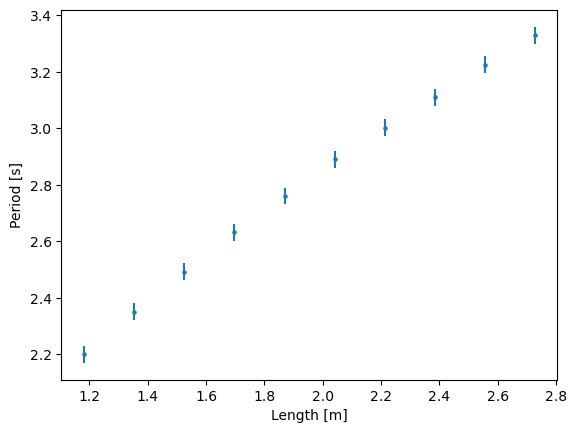

In [8]:
periodVsLength['onePeriod']=periodVsLength['period']/10
periodVsLength['errOnePeriod']=.03

ax = periodVsLength.plot(
    x='length',
    xlabel='Length [m]',
    y='onePeriod',
    yerr='errOnePeriod',
    ylabel='Period [s]',
    kind='scatter',
    marker='.',
    title=f"Period measurement with various lengths, with amplitude = {periodVsLength['amplitude'][0]}$\\degree$"
)
gpa.figure(ax)

# Discussion
This is an important experiment, because ...

In [19]:
#gpa.validate()